<a href="https://colab.research.google.com/github/2714830587-xh/CLRS-GG/blob/master/chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l

     |████████████████████████████████| 82 kB 560 kB/s 
     |████████████████████████████████| 9.9 MB 19.4 MB/s 
     |████████████████████████████████| 61 kB 7.4 MB/s 
     |████████████████████████████████| 15.7 MB 28.2 MB/s 
     |████████████████████████████████| 11.2 MB 33.3 MB/s 
     |████████████████████████████████| 900 kB 46.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's depende

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
     |████████████████████████████████| 12.8 MB 5.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requi

loss 0.330, train acc 0.879, test acc 0.883
416.7 examples/sec on cuda:0


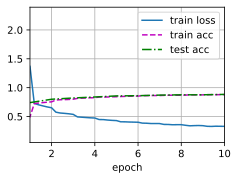

In [ ]:

import torch
import torch.nn as nn
from d2l import torch as d2l

net=nn.Sequential(
    nn.Conv2d(in_channels=1,out_channels=96,kernel_size=(11,11),stride=4,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(3,3),stride=2),
    nn.Conv2d(in_channels=96,out_channels=256,kernel_size=(5,5),padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(3,3),stride=2),
    nn.Conv2d(256,384,(3,3),padding=1),
    nn.ReLU(),
    nn.Conv2d(384,384,(3,3),padding=1),
    nn.ReLU(),
    nn.Conv2d(384,256,(3,3),padding=1),
    nn.ReLU(),
    nn.MaxPool2d((3,3),stride=2),
    nn.ReLU(),
    nn.Flatten(),
    nn.ReLU(),
    nn.Linear(6400,4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096,10)
)


x=torch.randn(1,1,224,224)
for layer in net:
  x=layer(x)
  print(layer.__class__.__name__,"output shape:\t",x.shape)
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
with torch.no_grad():
    n_sample=0
    n_correct=0
    n_class_correct=[0 for i in range(10)]
    n_class_sample=[0 for i in range(10)]
    for imgs,labels in  test_iter:
        imgs=imgs.to(device)
        
        labels=labels.to(device)
        
        output=net(imgs)
        _,pre_index=torch.max(output,1)
        n_correct+=(pre_index==labels).sum().item()
        n_sample+=len(labels)
        for i in range(len(pre_index)):
            if(pre_index[i]==labels[i]):
                n_class_correct[labels[i]]+=1
            n_class_sample[labels[i]]+=1
    print("acc",(n_correct/n_sample)*100)
    for i in range(10):
        acc=100*n_class_correct[i]/(n_class_sample[i])
        print(f"{text_labels[i]}   ,{acc}")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


acc 88.31
t-shirt   ,87.3
trouser   ,97.0
pullover   ,76.7
dress   ,91.3
coat   ,82.0
sandal   ,97.6
shirt   ,63.4
sneaker   ,94.5
bag   ,97.8
ankle boot   ,95.5


# **Pytorch 计算模型的FLOPs和参数量**

In [ ]:
!pip install pip install ptflops
from ptflops import get_model_complexity_info
model_name = 'AlexNet'
flops, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True, 
print_per_layer_stat=True)#不用写batch_size大小，默认batch_size=1
print("%s |%s |%s" % (model_name, flops, params))


Sequential(
  46.76 M, 100.000% Params, 939.87 MMac, 100.000% MACs, 
  (0): Conv2d(11.71 k, 0.025% Params, 34.15 MMac, 3.634% MACs, 1, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
  (1): ReLU(0, 0.000% Params, 279.94 KMac, 0.030% MACs, )
  (2): MaxPool2d(0, 0.000% Params, 279.94 KMac, 0.030% MACs, kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(614.66 k, 1.314% Params, 415.51 MMac, 44.209% MACs, 96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(0, 0.000% Params, 173.06 KMac, 0.018% MACs, )
  (5): MaxPool2d(0, 0.000% Params, 173.06 KMac, 0.018% MACs, kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(885.12 k, 1.893% Params, 127.46 MMac, 13.561% MACs, 256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(0, 0.000% Params, 55.3 KMac, 0.006% MACs, )
  (8): Conv2d(1.33 M, 2.839% Params, 191.16 MMac, 20.339% MACs, 384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 